# ch20_6 function call

chatgpt의 한계점 중에 하나는 실시간 정보를 반영하여 답변을 생성하지 못한다는 것입니다. 예를 들어서 chatGPT에게 오늘의 날씨를 물어보겠습니다.

검색 엔진에 내일 [지역] 날씨를 검색하라고 답변이 생성됩니다. 그렇다면 chatGPT가 검색엔진을 직접 사용할 수 있다면 어떨까요? chatGPT에서 쓸 수 있는 도구를 쥐여주는 기법이 바로 function calling입니다. 먼저 기상청에서 제공하는 API를 사용해서 내일 날씨를 조회해보겠습니다.

## 기상청 API

먼저 날씨 정보를 가져오기 위해서 기상청 API를 연결해보겠습니다. 아래 링크로 들어가서 로그인 한 뒤, 기상청 단기 예보 API 활용 신청을 한 다음 API 키 값을 가져오겠습니다.

기상청 단기예보 OPEN API: https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15084084

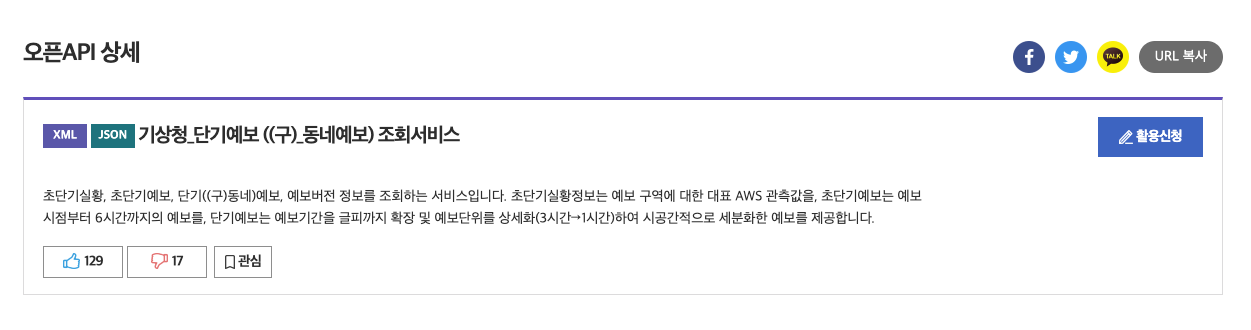
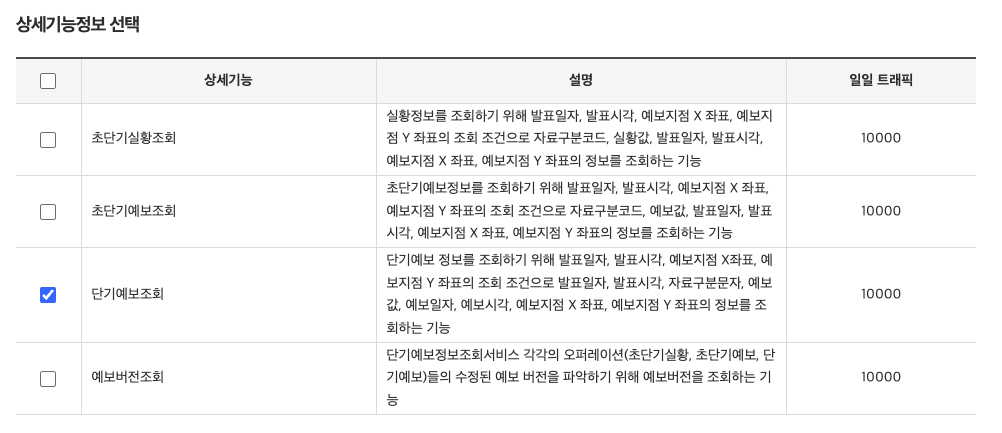

발급받은 키 값은 환경변수에 등록해줍니다. 등록이 잘 되었는지 한번 체크해보겠습니다.

이제 weather_utils 폴더 아래에 미리 짜둔 기상청 API 요청 및 결과 후처리 함수를 이용해서 날씨 정보를 받아오겠습니다. 기상청 단기 예보 API는 현재 시점으로부터 3일 이내의 날씨 밖에는 처리할 수 없어서 "내일" 혹은 "모레" 날씨 정보만 가져올 수 있습니다.

## function calling

### functions 파라미터

이제 chatGPT에게 기상청 API를 이용해서 날씨 정보를 가져올 수 있는 도구를 쥐여준 채로 호출을 해보겠습니다. chatGPT를 호출할 때, AI가 쓸 수 있는 function에 대한 묘사를 함께 실어서 보내주면 됩니다.

응답 결과를 확인해보면 곧바로 텍스트를 생성해주는 것이 아니라, "내일"을 파라미터로 넣어서 get_weather_forecast를 호출하라고 내려왔습니다. 

기존 messages에 function calling을 요청한 현재 응답을 추가해주겠습니다.

### function 호출 및 결과 저장

function calling 결과로 리턴된 함수 명과 파라미터를 가지고 함수를 호출해서 결과를 가져와 보겠습니다.

function call 호출 결과는 role을 "function"으로 지정해서 messages에 추가해줍니다.

### funciton calling 결과 포함해서 재요청

function calling 결과를 messages에 포함해서 다시 chat_completion을 요청해줍니다.

### 답변 데코레이션

완성된 답변이 너무 딱딱해서 마음에 들지 않습니다. chatGPT에게 역할을 부여해서 부드럽게 답변을 생성해보겠습니다.

### function calling 함수화

function calling을 활용할 수 있도록 request_chat_completion 함수를 다시 작성해보겠습니다.

## 정리

이번 챕터에서는 chatGPT에게 도구를 쥐여주는 function calling에 대해서 알아보았습니다. 이를 잘 활용한다면 내가 원하는 목적에 맞는 챗봇 서비스를 구현할 수 있습니다. 가령 농산물의 시세를 알려주는 챗 봇의 경우, 농산물 가격 정보 API를 연동해주면 됩니다. 이와 같은 기법으로 최신 정보나 특정 분야에 딱맞는 답변을 생성하지 못한다는 기존 LLM의 한계를 뛰어넘을 수 있습니다.